# Coarse optimization of the network
Given time constraints, implementing this into a bayesian optimization protocol wasn't feasible. 
However, some simple improvements can be made from exploring the architecture and hyperparameters.

### Hyperparameters explored: 
 - Learning rate
 - Filter depth using 2 identical convolutional layers
 - Filter depth using 2 growing convolutional layers
 - Filter depth using 3 growing convolutional layers
 - Kernel size
 - Dense layers
 - Dropout

From this, it is clear that the architecture is capable of acheiving ~96% accuracy on the training data, and  --- assuming the training data is representative --- the efforts should be focused on reducing the bias in the network, and closing the gap between the training and test accuracy. This could be accomplished by considering regularization, additional dropout (in dense connections), data preprocessing, or different architectures that capture the training information with smaller networks. 

In [1]:
import sys
sys.path.append('../')
import os 
import shutil
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from HAR.ml.CNN1d import training, run_experiment
from HAR.data_utils.pkl import load_obj

In [15]:
def plot_loss_acc(exp_dirs, outpath=None):
    """Plots loss and accuracy for all experiments in exp_dirs"""
    fig, axes = plt.subplots(len(exp_dirs), 2, figsize=(10,15))
    axes[0,0].set_title('Loss', size=30)
    axes[0,1].set_title('Accuracy (%)', size=30)
    for i, d in enumerate(exp_dirs):
        metrics = load_obj(os.path.join(d,'metrics_dict.pkl'))
        axes[i,0].plot(np.arange(len(metrics['train_loss'])),metrics['train_loss'], 'r', label='train')
        axes[i,0].plot(np.arange(len(metrics['train_loss'])),metrics['test_loss'], 'b', label='test')
        axes[i,1].plot(np.arange(len(metrics['train_loss'])),metrics['train_acc'], 'r', label='train')
        axes[i,1].plot(np.arange(len(metrics['train_loss'])),metrics['test_acc'], 'b', label='test')
        axes[i,1].set_ylim(70,100)
    axes[0,0].legend()
    axes[0,1].legend()
    if outpath: fig.savefig(outpath)
    return fig

### Slow down learning rate

Training learning rate 0.001
Training for experiment 1
Finised training in 1.712 minutes
Test accuracy : 92.30%
Training for experiment 2
Finised training in 1.733 minutes
Test accuracy : 89.72%
Training for experiment 3
Finised training in 1.722 minutes
Test accuracy : 89.31%
Finised training 3 models in 5.221 minutes
Average metrics over 3 runs
train_loss:    0.002
test_loss:    0.016
train_acc:   96.754
test_acc:   90.442

Training learning rate 0.0001
Training for experiment 1
Finised training in 1.743 minutes
Test accuracy : 88.36%
Training for experiment 2
Finised training in 1.783 minutes
Test accuracy : 88.70%
Training for experiment 3
Finised training in 1.694 minutes
Test accuracy : 88.43%
Finised training 3 models in 5.262 minutes
Average metrics over 3 runs
train_loss:    0.004
test_loss:    0.013
train_acc:   95.153
test_acc:   88.497

Training learning rate 3.1622776601683795e-05
Training for experiment 1
Finised training in 1.685 minutes
Test accuracy : 85.24%
Training f

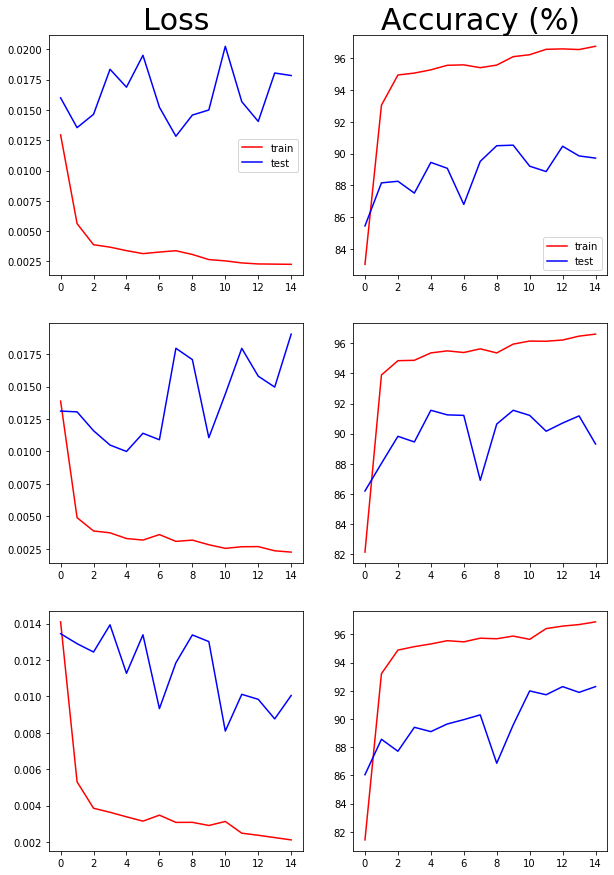

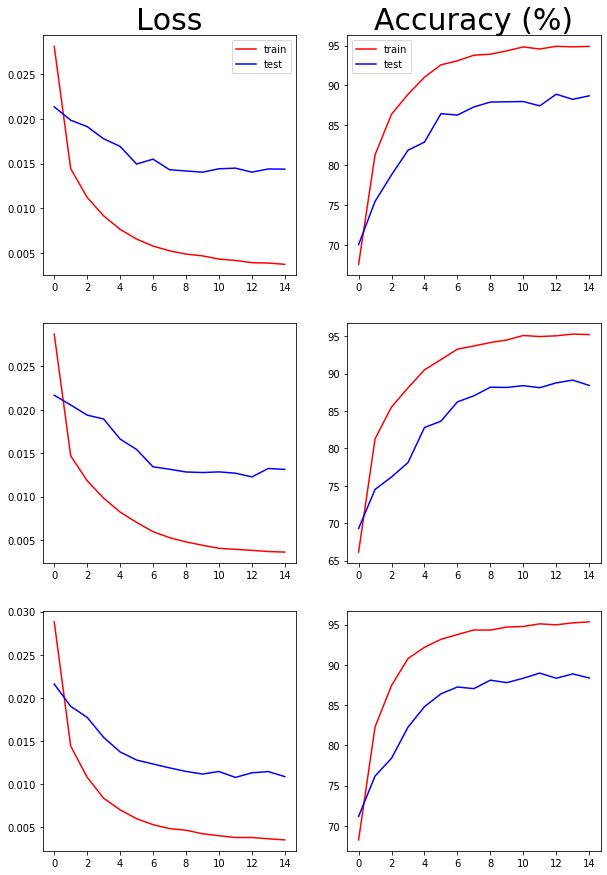

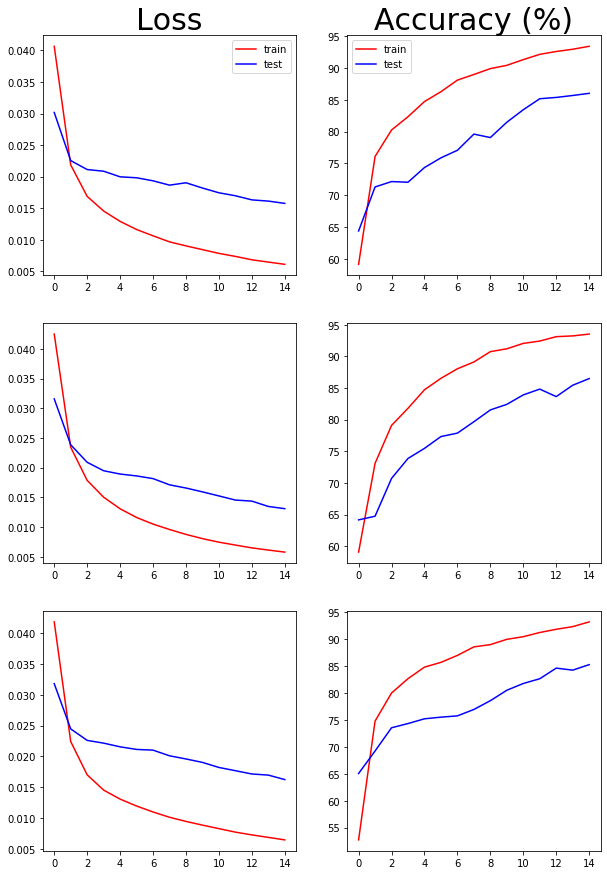

In [3]:
for i, lr in enumerate([10**x for x in [-3, -4, -4.5]]):
    print("Training learning rate {}".format(lr))
    _dir = '../tmp/tmp_lr{}'.format(i)
    if os.path.isdir(_dir): shutil.rmtree(_dir)
    avg_metrics = run_experiment(_dir, repeats=3, verbose=False, n_epochs=15, lr=lr)
    exp_dirs = [os.path.join(_dir,d) for d in os.listdir(_dir) if os.path.isdir(os.path.join(_dir,d))]
    fig = plot_loss_acc(exp_dirs, '../tmp/tmp_lr{}.png'.format(i))
    print()

### Filter depth, 2 layers fixed

Training filters 8
Training for experiment 1
Finised training in 0.434 minutes
Test accuracy : 78.01%
Training for experiment 2
Finised training in 0.433 minutes
Test accuracy : 78.59%
Training for experiment 3
Finised training in 0.446 minutes
Test accuracy : 79.44%
Finised training 3 models in 1.353 minutes
Average metrics over 3 runs
train_loss:    0.011
test_loss:    0.018
train_acc:   86.634
test_acc:   78.679

Training filters 16
Training for experiment 1
Finised training in 0.504 minutes
Test accuracy : 84.59%
Training for experiment 2
Finised training in 0.500 minutes
Test accuracy : 83.07%
Training for experiment 3
Finised training in 0.499 minutes
Test accuracy : 84.63%
Finised training 3 models in 1.545 minutes
Average metrics over 3 runs
train_loss:    0.007
test_loss:    0.015
train_acc:   91.639
test_acc:   84.097

Training filters 32
Training for experiment 1
Finised training in 0.634 minutes
Test accuracy : 87.41%
Training for experiment 2
Finised training in 0.639 minu

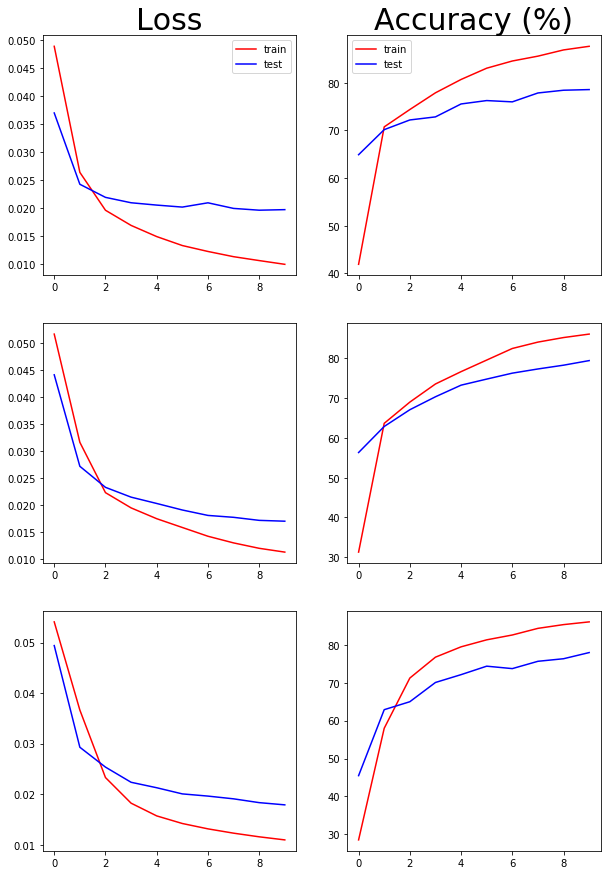

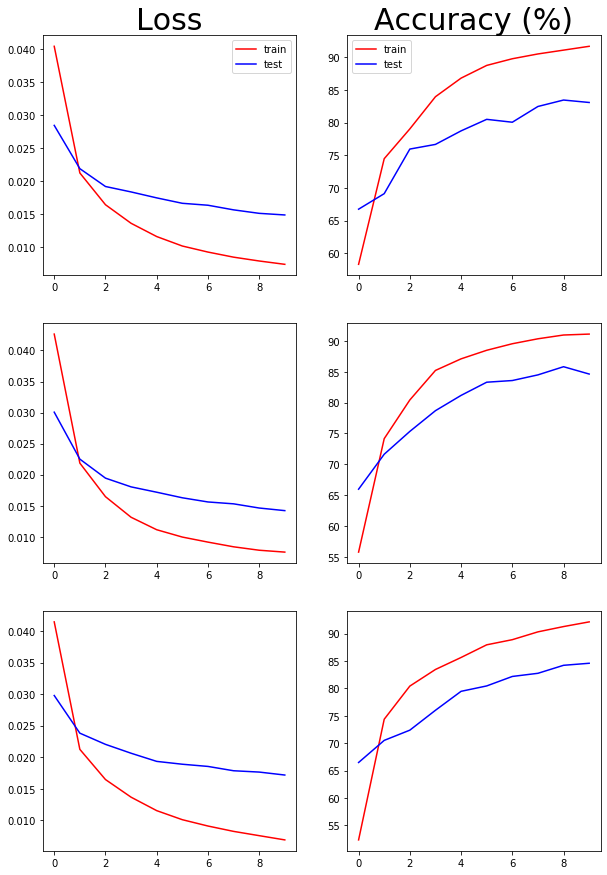

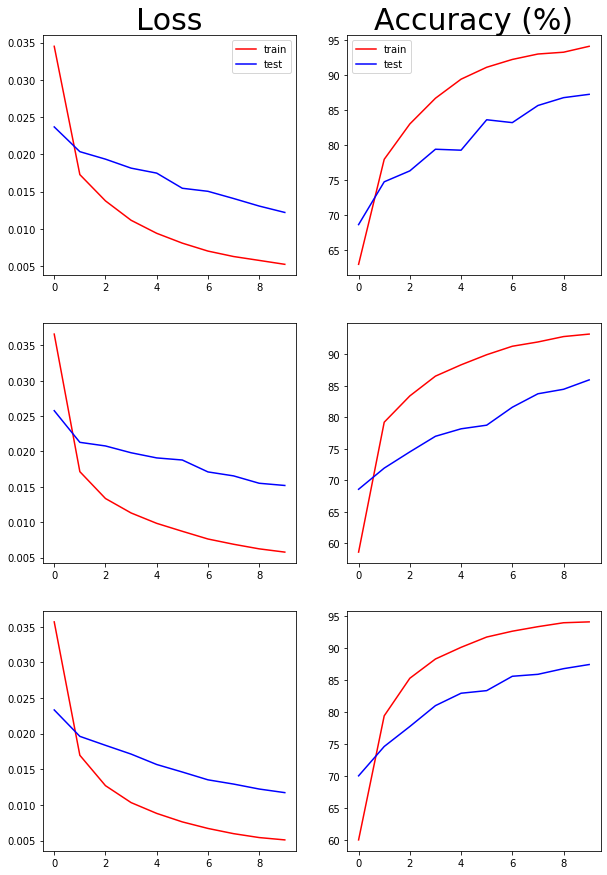

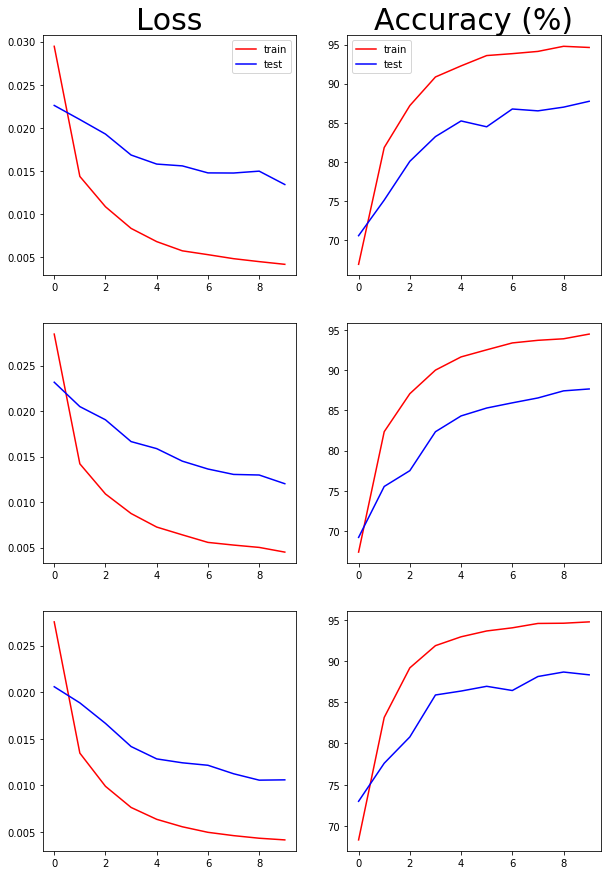

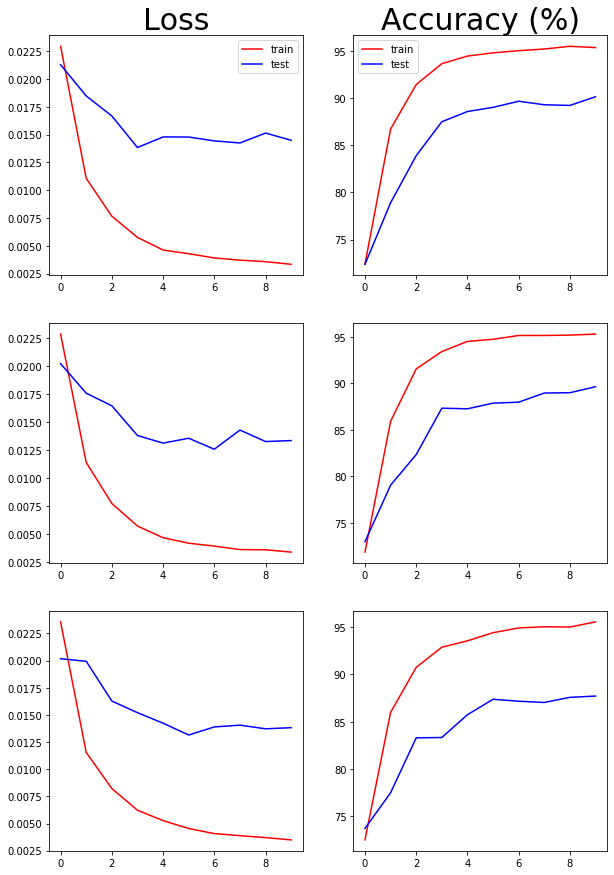

In [4]:
for i, filters in enumerate([8,16, 32, 64, 128]):
    print("Training filters {}".format(filters))
    _dir = '../tmp/tmp_filters{}'.format(filters)
    if os.path.isdir(_dir): shutil.rmtree(_dir)
    avg_metrics = run_experiment(_dir, repeats=3, verbose=False, n_epochs=10, lr=0.0001, filters=(filters,filters))
    exp_dirs = [os.path.join(_dir,d) for d in os.listdir(_dir) if os.path.isdir(os.path.join(_dir,d))]
    fig = plot_loss_acc(exp_dirs, '../tmp/tmp_filters{}.png'.format(i))
    print()

### 2 filters changing

Training filters (8, 16)
Training for experiment 1
Finised training in 0.543 minutes
Test accuracy : 81.37%
Training for experiment 2
Finised training in 0.518 minutes
Test accuracy : 80.32%
Training for experiment 3
Finised training in 0.535 minutes
Test accuracy : 82.97%
Finised training 3 models in 1.639 minutes
Average metrics over 3 runs
train_loss:    0.009
test_loss:    0.016
train_acc:   89.708
test_acc:   81.552

Training filters (32, 64)
Training for experiment 1
Finised training in 0.973 minutes
Test accuracy : 87.89%
Training for experiment 2
Finised training in 0.927 minutes
Test accuracy : 86.33%
Training for experiment 3
Finised training in 0.906 minutes
Test accuracy : 86.43%
Finised training 3 models in 2.853 minutes
Average metrics over 3 runs
train_loss:    0.005
test_loss:    0.013
train_acc:   94.296
test_acc:   86.879

Training filters (64, 128)
Training for experiment 1
Finised training in 1.867 minutes
Test accuracy : 88.39%
Training for experiment 2
Finised tra

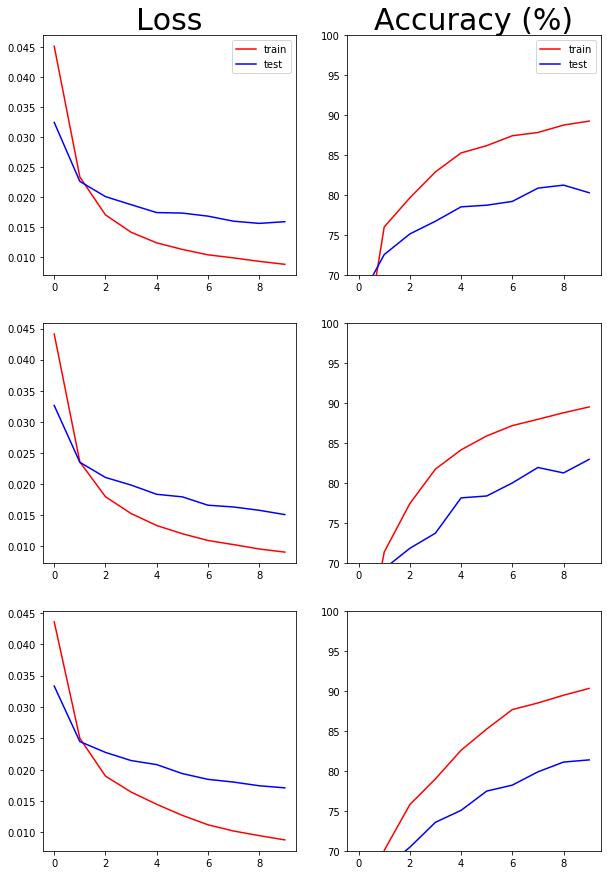

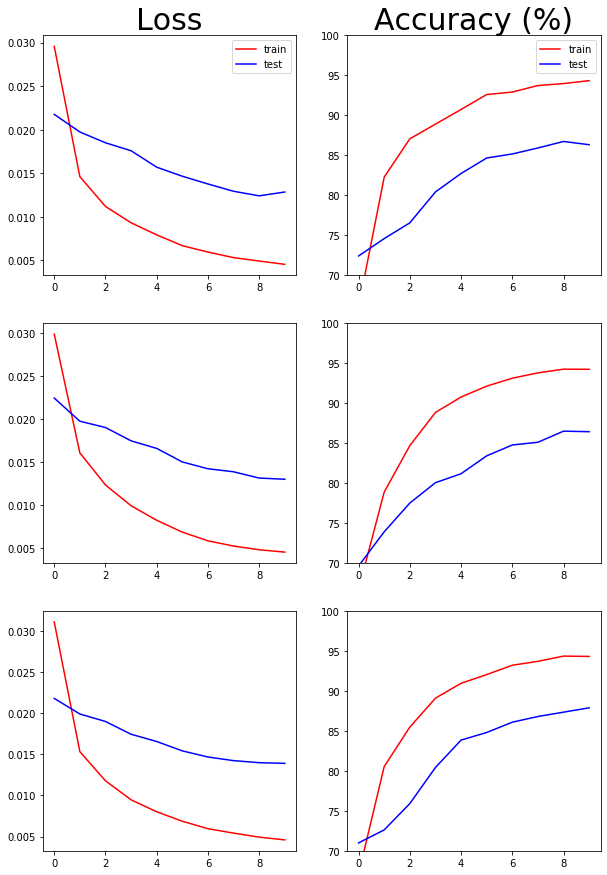

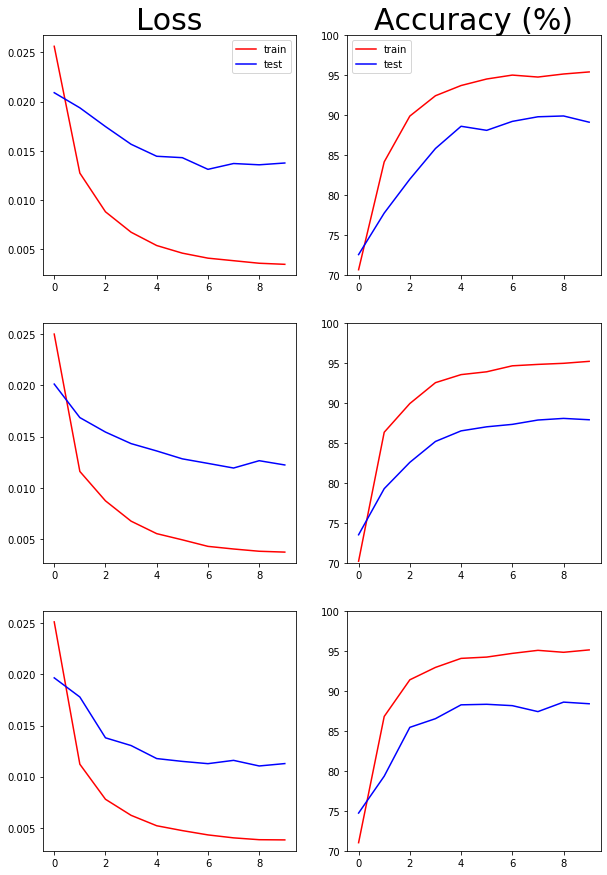

In [17]:
for i, filters in enumerate([(8,16), (32,64), (64,128)]):
    print("Training filters {}".format(filters))
    _dir = '../tmp/tmp_filters_inc{}'.format(filters)
    if os.path.isdir(_dir): shutil.rmtree(_dir)
    avg_metrics = run_experiment(_dir, repeats=3, verbose=False, n_epochs=10, lr=0.0001, filters=filters)
    exp_dirs = [os.path.join(_dir,d) for d in os.listdir(_dir) if os.path.isdir(os.path.join(_dir,d))]
    fig = plot_loss_acc(exp_dirs, '../tmp/tmp_filters_inc{}.png'.format(i))
    print()

### 3 Filters Changing

Training filters (16, 32, 64)
Training for experiment 1
Finised training in 1.047 minutes
Test accuracy : 86.12%
Training for experiment 2
Finised training in 1.015 minutes
Test accuracy : 86.33%
Training for experiment 3
Finised training in 0.967 minutes
Test accuracy : 86.05%
Finised training 3 models in 3.073 minutes
Average metrics over 3 runs
train_loss:    0.005
test_loss:    0.014
train_acc:   93.326
test_acc:   86.167

Training filters (32, 64, 128)
Training for experiment 1
Finised training in 2.067 minutes
Test accuracy : 87.41%
Training for experiment 2
Finised training in 2.111 minutes
Test accuracy : 88.36%
Training for experiment 3
Finised training in 2.061 minutes
Test accuracy : 85.17%
Finised training 3 models in 6.281 minutes
Average metrics over 3 runs
train_loss:    0.004
test_loss:    0.013
train_acc:   94.791
test_acc:   86.981

Training filters (64, 128, 256)
Training for experiment 1
Finised training in 5.325 minutes
Test accuracy : 89.72%
Training for experimen

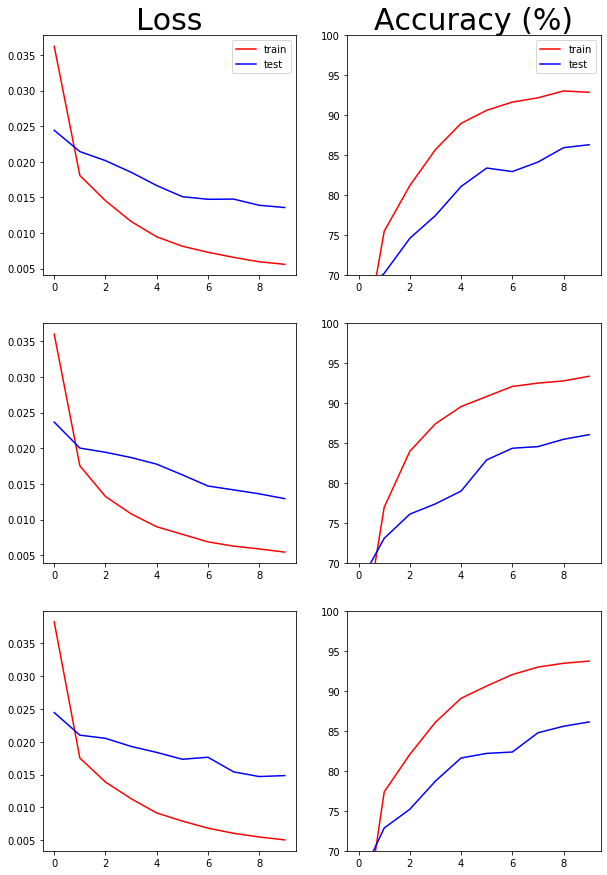

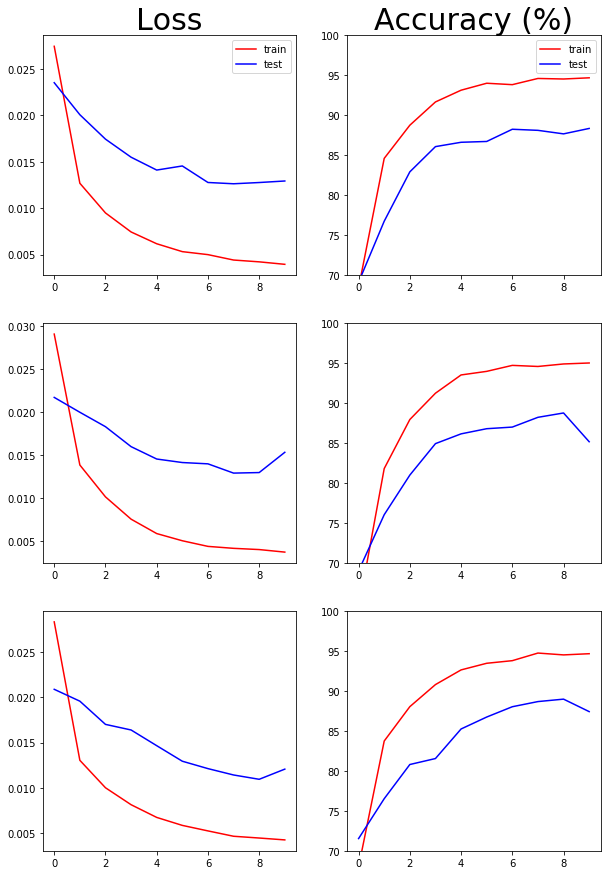

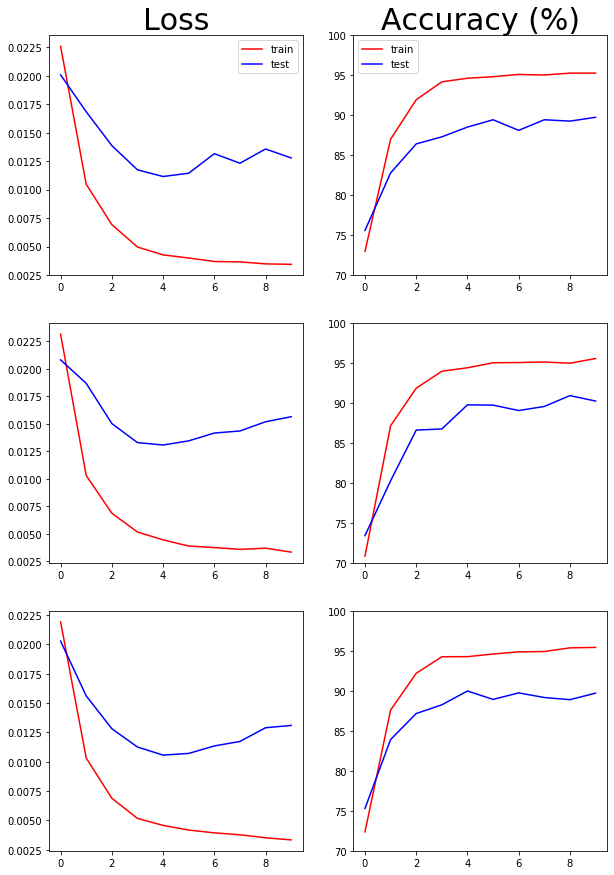

In [18]:
for i, filters in enumerate([(16,32,64), (32,64,128), (64,128,256)]):
    print("Training filters {}".format(filters))
    _dir = '../tmp/tmp_3filters_dec{}'.format(filters)
    if os.path.isdir(_dir): shutil.rmtree(_dir)
    avg_metrics = run_experiment(_dir, repeats=3, verbose=False, n_epochs=10, lr=0.0001, filters=filters, kernels=(3,3,3))
    exp_dirs = [os.path.join(_dir,d) for d in os.listdir(_dir) if os.path.isdir(os.path.join(_dir,d))]
    fig = plot_loss_acc(exp_dirs, '../tmp/tmp_3filters_dec{}.png'.format(i))
    print()

### Kernel size

Training kernel 5
Training for experiment 1
Finised training in 2.285 minutes
Test accuracy : 90.23%
Training for experiment 2
Finised training in 2.250 minutes
Test accuracy : 90.30%
Training for experiment 3
Finised training in 2.316 minutes
Test accuracy : 90.09%
Finised training 3 models in 6.896 minutes
Average metrics over 3 runs
train_loss:    0.003
test_loss:    0.012
train_acc:   95.235
test_acc:   90.205

Training kernel 7
Training for experiment 1
Finised training in 2.611 minutes
Test accuracy : 90.91%
Training for experiment 2
Finised training in 2.717 minutes
Test accuracy : 91.08%
Training for experiment 3
Finised training in 2.683 minutes
Test accuracy : 88.77%
Finised training 3 models in 8.057 minutes
Average metrics over 3 runs
train_loss:    0.003
test_loss:    0.010
train_acc:   95.412
test_acc:   90.250



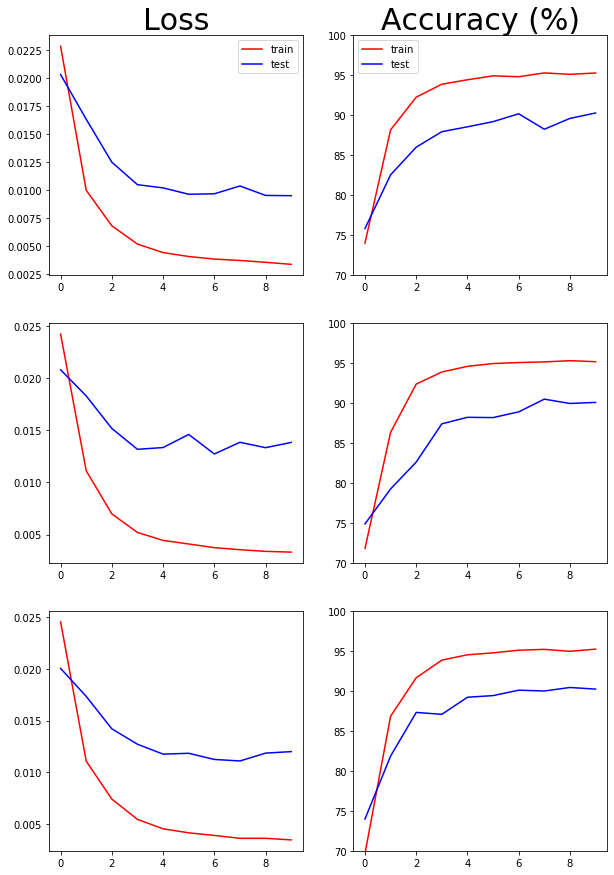

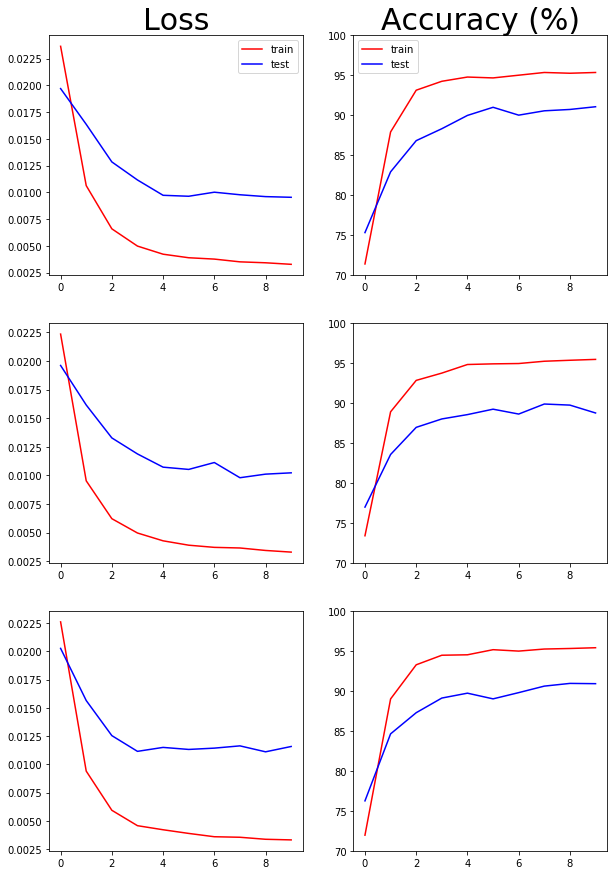

In [20]:
lr = 10**-4
for i, kernel in enumerate([5,7]):
    kernels = tuple([kernel for _ in range(2)])
    print("Training kernel {}".format(kernel))
    _dir = '../tmp/tmp_kernels{}'.format(filters)
    if os.path.isdir(_dir): shutil.rmtree(_dir)
    avg_metrics = run_experiment(_dir, repeats=3, verbose=False, n_epochs=10, lr=lr, filters=(64,128), kernels=kernels)
    exp_dirs = [os.path.join(_dir,d) for d in os.listdir(_dir) if os.path.isdir(os.path.join(_dir,d))]
    fig = plot_loss_acc(exp_dirs, '../tmp/tmp_kernels{}.png'.format(i))
    print()

### Dense layers

Training dense (50,)
Training for experiment 1
Finised training in 3.655 minutes
Test accuracy : 91.08%
Training for experiment 2
Finised training in 3.675 minutes
Test accuracy : 91.69%
Training for experiment 3
Finised training in 3.642 minutes
Test accuracy : 90.50%
Finised training 3 models in 11.015 minutes
Average metrics over 3 runs
train_loss:    0.003
test_loss:    0.011
train_acc:   95.693
test_acc:   91.087

Training dense (200,)
Training for experiment 1
Finised training in 4.257 minutes
Test accuracy : 90.36%
Training for experiment 2
Finised training in 4.302 minutes
Test accuracy : 90.97%
Training for experiment 3
Finised training in 4.370 minutes
Test accuracy : 89.82%
Finised training 3 models in 12.974 minutes
Average metrics over 3 runs
train_loss:    0.003
test_loss:    0.016
train_acc:   95.761
test_acc:   90.386

Training dense (50, 50)
Training for experiment 1
Finised training in 3.550 minutes
Test accuracy : 90.67%
Training for experiment 2
Finised training in 

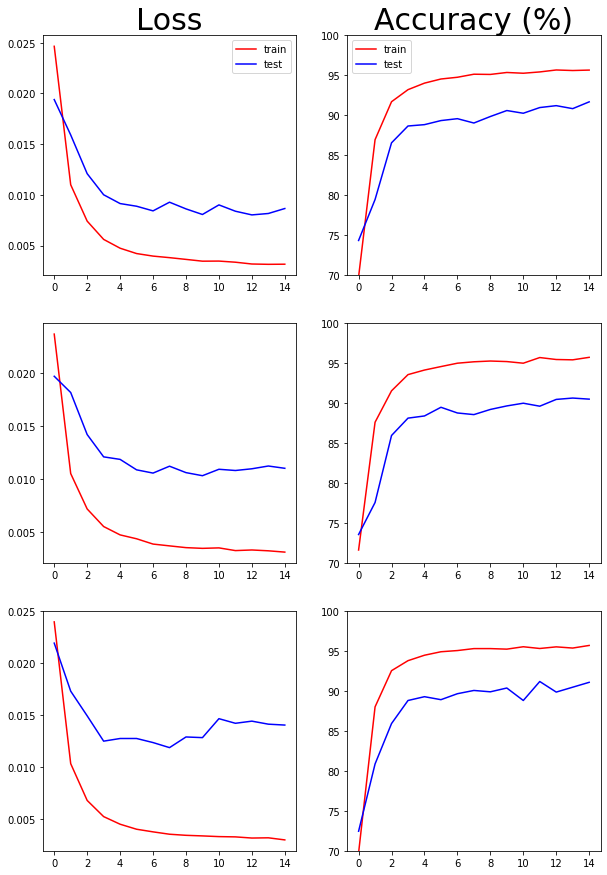

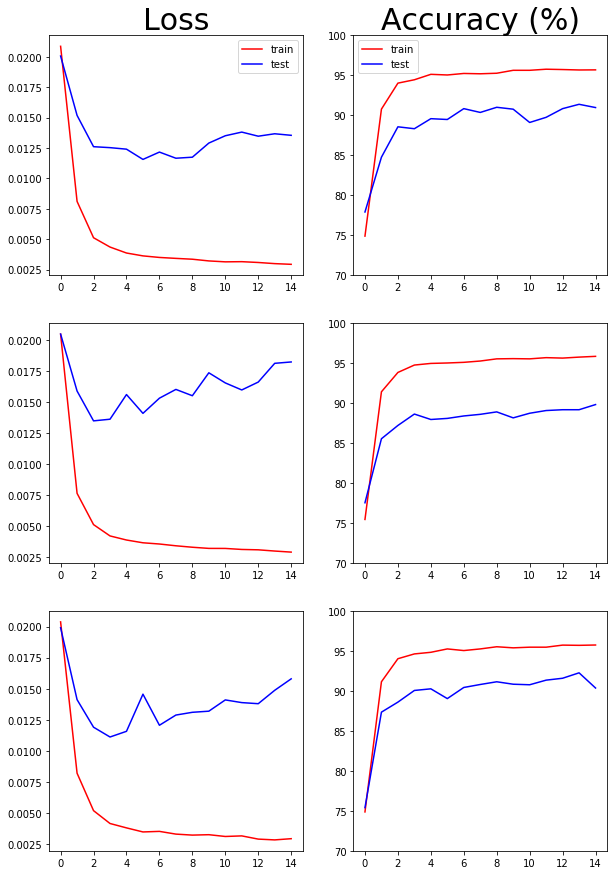

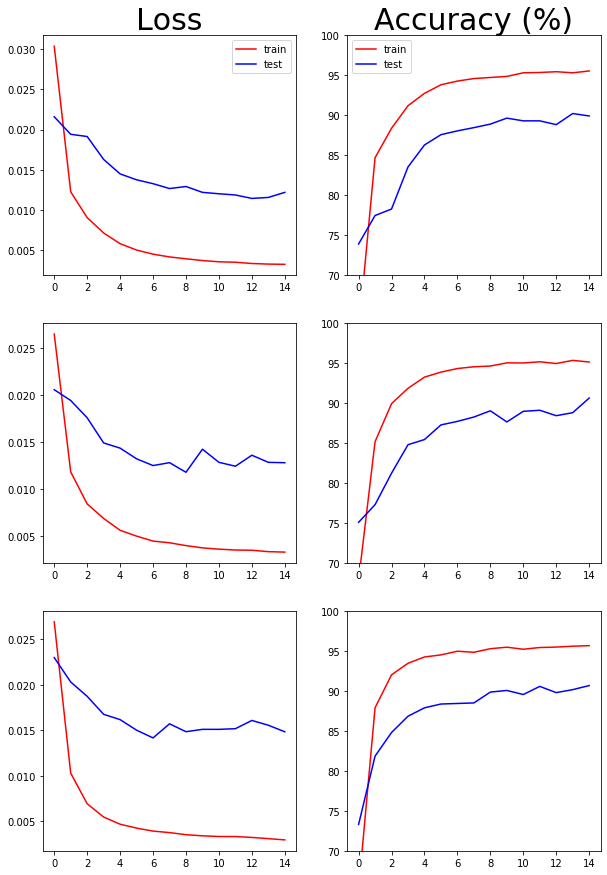

In [21]:
lr = 10**-4.0
for i, dense in enumerate([(50,), (200,), (50,50)]):
    kernels = tuple([kernel for _ in range(3)])
    print("Training dense {}".format(dense))
    _dir = '../tmp/tmp_dense{}'.format(i)
    if os.path.isdir(_dir): shutil.rmtree(_dir)
    avg_metrics = run_experiment(_dir, repeats=3, verbose=False, n_epochs=15, lr=lr, filters=(64,128), kernels=(7,7), dense=dense)
    exp_dirs = [os.path.join(_dir,d) for d in os.listdir(_dir) if os.path.isdir(os.path.join(_dir,d))]
    fig = plot_loss_acc(exp_dirs, '../tmp/tmp_dense{}.png'.format(i))
    print()

### Dropout

Training high dropout dense (200,)
Training for experiment 1
Finised training in 4.041 minutes
Test accuracy : 91.69%
Training for experiment 2
Finised training in 4.144 minutes
Test accuracy : 89.79%
Training for experiment 3
Finised training in 5.790 minutes
Test accuracy : 91.58%
Finised training 3 models in 14.039 minutes
Average metrics over 3 runs
train_loss:    0.003
test_loss:    0.013
train_acc:   95.788
test_acc:   91.019

Training high dropout dense (400,)
Training for experiment 1
Finised training in 6.989 minutes
Test accuracy : 89.41%
Training for experiment 2
Finised training in 5.624 minutes
Test accuracy : 90.84%
Training for experiment 3
Finised training in 5.002 minutes
Test accuracy : 91.04%
Finised training 3 models in 17.682 minutes
Average metrics over 3 runs
train_loss:    0.003
test_loss:    0.015
train_acc:   95.978
test_acc:   90.431

Training high dropout dense (50, 50)
Training for experiment 1
Finised training in 3.561 minutes
Test accuracy : 90.13%
Traini

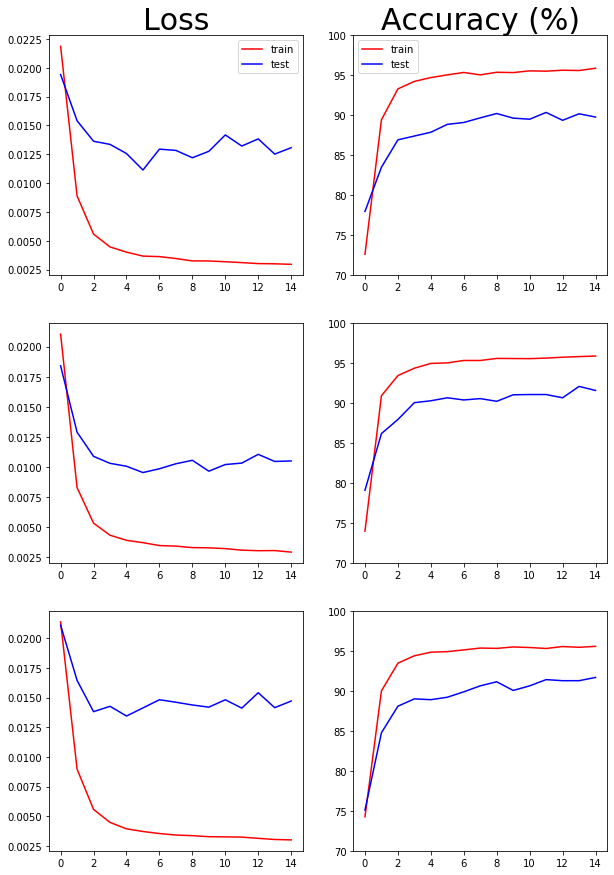

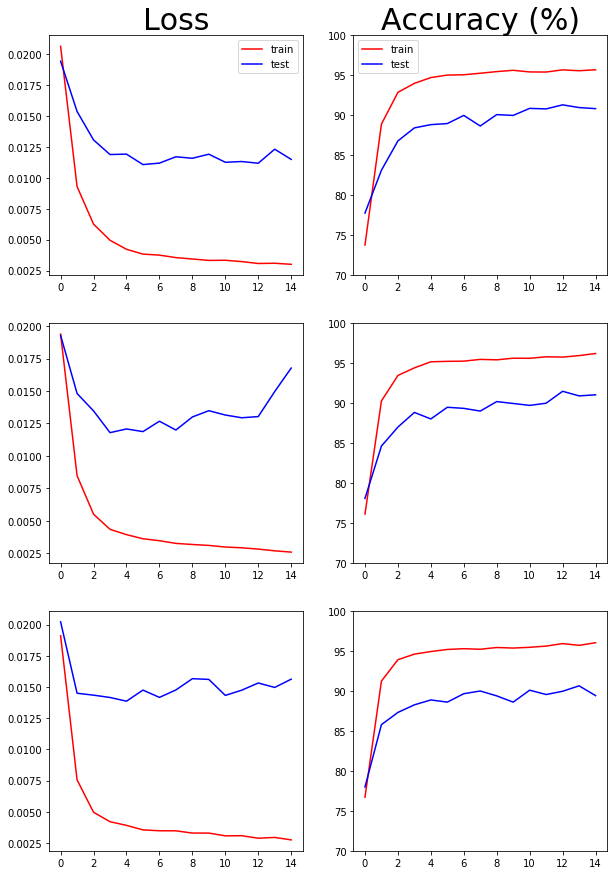

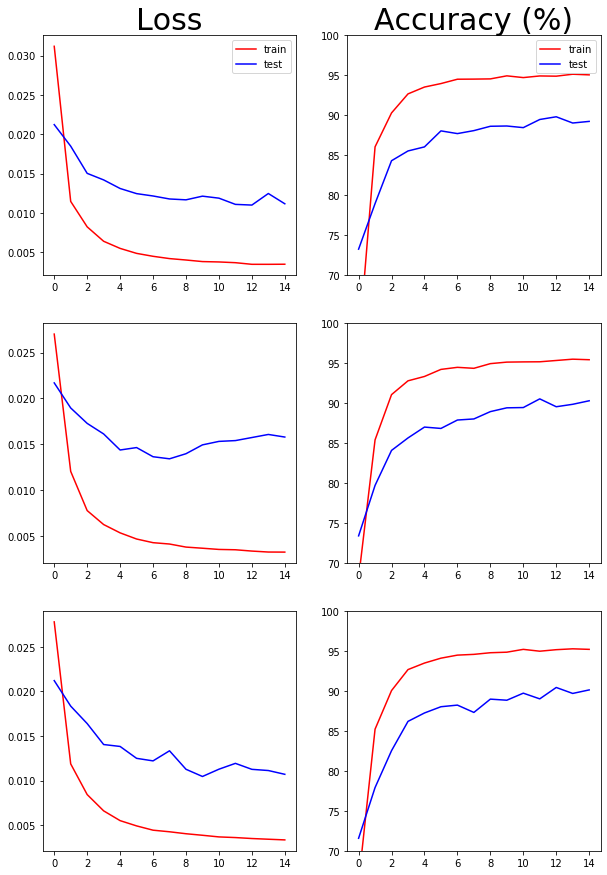

In [23]:
lr = 10**-4.0
for i, dense in enumerate([(200,), (400,), (50,50)]):
    kernels = tuple([kernel for _ in range(3)])
    print("Training high dropout dense {}".format(dense))
    _dir = '../tmp/tmp_dense_dropout{}'.format(i)
    if os.path.isdir(_dir): shutil.rmtree(_dir)
    avg_metrics = run_experiment(_dir, repeats=3, verbose=False, n_epochs=15, lr=lr, filters=(64,128), 
                                 kernels=(7,7), dense=dense, dropout=0.8)
    exp_dirs = [os.path.join(_dir,d) for d in os.listdir(_dir) if os.path.isdir(os.path.join(_dir,d))]
    fig = plot_loss_acc(exp_dirs, '../tmp/tmp_dense_dropout{}.png'.format(i))
    print()